# 考查C

In [1]:
%%html
<style>
/* 本作业使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 50%;
    height: auto;
    float: center;
}
/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}

</style>

## 高德功能API调用

In [2]:
import pandas as pd
import requests
key ="adc12629949386ec11091288b1fc3600"

## 地理编码

In [4]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [5]:
广州大学 = geocode(address='广东省广州市番禺区广州大学')
print(广州大学)
df_广州大学地理编码 = pd.json_normalize(广州大学['geocodes'])
display(df_广州大学地理编码)
广州大学地理编码 = 广州大学['geocodes'][0]['location']
print("广州大学地理编码:",广州大学地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省广州市番禺区广州大学', 'country': '中国', 'province': '广东省', 'citycode': '020', 'city': '广州市', 'district': '番禺区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440113', 'street': [], 'number': [], 'location': '113.371114,23.037870', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省广州市番禺区广州大学,中国,广东省,020,广州市,番禺区,[],440113,[],[],"113.371114,23.037870",兴趣点,[],[],[],[]


广州大学地理编码: 113.371114,23.037870


 * 获取地理编码含有AI中信息提取的功能

## 逆地理编码

In [6]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [7]:
广州大学逆地理编码= regeocode(广州大学地理编码)
print(广州大学逆地理编码)
df_广州大学逆地理编码 = pd.json_normalize(广州大学逆地理编码).T
display(df_广州大学逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440113', 'district': '番禺区', 'towncode': '440113011000', 'streetNumber': {'number': '230号', 'location': '113.372607,23.0406939', 'direction': '东北', 'distance': '349.213', 'street': '大学城外环西路'}, 'country': '中国', 'township': '小谷围街道', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '020'}, 'formatted_address': '广东省广州市番禺区小谷围街道广州大学大学城校区行政东楼广州大学大学城校区'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,广州市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440113
regeocode.addressComponent.district,番禺区
regeocode.addressComponent.towncode,440113011000
regeocode.addressComponent.streetNumber.number,230号
regeocode.addressComponent.streetNumber.location,"113.372607,23.0406939"


 * 获取逆地理编码含有AI中信息提取的功能

### 骑行路径规划

In [8]:
def bicycling(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v4/direction/bicycling?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [9]:
广东工业大学 = geocode('广东省广州市番禺区广东工业大学')
广东工业大学_location = 广东工业大学['geocodes'][0]['location']
广州大学_location = 广州大学['geocodes'][0]['location']
print("(起点)广州大学_location:",广州大学_location,"(终点)广东工业大学_location:",广东工业大学_location)

(起点)广州大学_location: 113.371114,23.037870 (终点)广东工业大学_location: 113.394416,23.043587


In [10]:
广州大学_广东工业大学 = bicycling(广州大学_location,广东工业大学_location)
广州大学_广东工业大学
df_骑行路径规划 = pd.json_normalize(广州大学_广东工业大学 ["data"]["paths"][0]['steps'])
display(df_骑行路径规划)
df_骑行路径规划["instruction"]

,action,assistant_action,distance,duration,instruction,orientation,polyline,road,walk_type
0,右转,,136,33,向北骑行136米右转,北,"113.370924,23.037869;113.370924,23.038516;113....",,0
1,右转,,200,48,向东北骑行200米右转,东北,"113.370933,23.03911;113.371597,23.039128;113.3...",,0
2,左转,,1999,480,沿大学城中环西路向东骑行1999米左转,东,"113.372352,23.040065;113.372578,23.039905;113....",大学城中环西路,0
3,右转,,180,43,沿大学城广工二路向北骑行180米右转,北,"113.391163,23.040968;113.39122,23.041133;113.3...",大学城广工二路,0
4,左转,,165,40,向东骑行165米左转,东,"113.391484,23.042591;113.391563,23.042591;113....",,0
5,右转,,95,23,向北骑行95米右转,北,"113.393112,23.042587;113.393116,23.043003;113....",,0
6,,到达目的地,132,32,向东骑行132米到达目的地,东,"113.393116,23.043451;113.394414,23.043451",,0


0             向北骑行136米右转
1            向东北骑行200米右转
2    沿大学城中环西路向东骑行1999米左转
3     沿大学城广工二路向北骑行180米右转
4             向东骑行165米左转
5              向北骑行95米右转
6          向东骑行132米到达目的地
Name: instruction, dtype: object

* 路径规划可能含有推荐系统的功能

## 行政区域查询

In [11]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [12]:
行政区域 = district(keywords='湖北',extensions='all',subdistrict=1)
df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
df_行政区域_1级

,citycode,adcode,name,center,level,districts
0,027,420100,武汉市,"114.298572,30.584355",city,[]
1,0712,420900,孝感市,"113.926655,30.926423",city,[]
2,0713,421100,黄冈市,"114.879365,30.447711",city,[]
3,0724,420800,荆门市,"112.204251,31.03542",city,[]
4,0719,420300,十堰市,"110.787916,32.646907",city,[]
5,0717,420500,宜昌市,"111.290843,30.702636",city,[]
6,1728,429006,天门市,"113.165862,30.653061",city,[]
7,0710,420600,襄阳市,"112.144146,32.042426",city,[]
8,0728,429004,仙桃市,"113.453974,30.364953",city,[]
9,2728,429005,潜江市,"112.896866,30.421215",city,[]


* 行政区域可能含有信息提取的功能

## 搜索POI之多边形搜索

In [13]:
def place_polygon(polygon,keywords=None,types=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = "https://restapi.amap.com/v3/place/polygon?parameters "
    params={
        'key':key,
        'polygon':polygon,
        'keywords':keywords,
        'types':types,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [14]:
多边形POI = place_polygon(polygon="116.460988,40.006919|116.48231,40.007381;116.47516,39.99713|116.472596,39.985227|116.45669,39.984989|116.460988,40.006919",offset=15)
多边形POI

{'status': '1',
 'count': '879',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'BV10013356',
   'parent': [],
   'childtype': [],
   'name': '望京(地铁站)',
   'type': '交通设施服务;地铁站;地铁站',
   'typecode': '150500',
   'biz_type': [],
   'address': '14号线东段;15号线',
   'location': '116.469409,39.998521',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '北京市',
   'cityname': '北京市',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'BV10416592',
   'parent': [],
   'childtype': [],
   'name': '阜通(地铁站)',
   'type': '交通设施服务;地铁站;地铁站',
   'typecode': '150500',
   'biz_type': [],
   'address': '14号线东段',
   'location': '116.471740,39.991699',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '北京市',
   'cityname': '北京市',
   'adname': '朝阳区',
   'importance': [],
   'shopid': [],
   'shopinfo': '2',
   'poiweight': [],
   'photos': []},
  {'id': 'B000A7W4

In [15]:
df_多边形POI = pd.json_normalize(多边形POI['pois'])
df_多边形POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,pname,cityname,adname,importance,shopid,shopinfo,poiweight,photos
0,BV10013356,[],[],望京(地铁站),交通设施服务;地铁站;地铁站,150500,[],14号线东段;15号线,"116.469409,39.998521",[],[],[],北京市,北京市,朝阳区,[],[],2,[],[]
1,BV10416592,[],[],阜通(地铁站),交通设施服务;地铁站;地铁站,150500,[],14号线东段,"116.471740,39.991699",[],[],[],北京市,北京市,朝阳区,[],[],2,[],[]
2,B000A7W44I,B0FFIJL0Q2,308,南湖东园2区,商务住宅;住宅区;住宅小区,120302,[],来广营,"116.465513,39.999783",[],[],[],北京市,北京市,朝阳区,[],[],0,[],[]
3,B000A844UJ,[],[],望京西园,商务住宅;住宅区;住宅小区,120302,[],宏昌路附近,"116.474395,40.004173",13581818718,[],[],北京市,北京市,朝阳区,[],[],0,[],[]
4,B000A7HA7I,[],[],大西洋新城,商务住宅;住宅区;住宅小区,120302,[],广顺北大街33号院,"116.466143,39.992265",18600842882,[],[],北京市,北京市,朝阳区,[],[],0,[],[]
5,B000A868CO,[],[],金隅国际,商务住宅;楼宇;商住两用楼宇,120203,[],望京西路48-4号,"116.458365,39.985906",[],[],[],北京市,北京市,朝阳区,[],[],0,[],[]
6,B000A843DP,[],[],圣馨大地家园,商务住宅;住宅区;住宅小区,120302,[],望京南湖南路9号,"116.461976,39.995678",[],[],[],北京市,北京市,朝阳区,[],[],0,[],[]
7,B000A7HS1R,[],[],花家地北里,商务住宅;住宅区;住宅小区,120302,[],花家地南街,"116.465856,39.986152",[],[],[],北京市,北京市,朝阳区,[],[],0,[],[]
8,B000A80FUH,[],[],福码大厦,商务住宅;楼宇;商务写字楼,120201,[],广顺北大街33号院1号楼,"116.467422,39.994876",010-84726888,[],[],北京市,北京市,朝阳区,[],[],0,[],[]
9,B000A7HS3L,[],[],花家地西里,商务住宅;住宅区;住宅小区,120302,[],南湖南路,"116.460082,39.988190",010-64716251,[],[],北京市,北京市,朝阳区,[],[],0,[],[]


* 搜索POI可能含有计算机视觉的功能

## IP定位

In [16]:
def ip_location(ip,sig=None)->dict:
    url = "https://restapi.amap.com/v3/ip?parameters "
    params={
        'key':key,
        'ip':ip,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [275]:
ip = ip_location("114.247.50.2")
ip

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '北京市',
 'city': '北京市',
 'adcode': '110000',
 'rectangle': '116.0119343,39.66127144;116.7829835,40.2164962'}

In [18]:
df_ip = pd.json_normalize(ip)
df_ip

,status,info,infocode,province,city,adcode,rectangle
0,1,OK,10000,北京市,北京市,110000,"116.0119343,39.66127144;116.7829835,40.2164962"


* IP定位可能含有信息提取的功能

## 批量请求接口

In [7]:
def batch()->dict:
                url = "https://restapi.amap.com/v3/batch?key=adc12629949386ec11091288b1fc3600"
                headers = {
                    'Content-Type': 'application/json', 
                             }
                data = {
                    "ops": [
                        {
                            "url": "/v3/place/around?offset=10&page=1&key=adc12629949386ec11091288b1fc3600&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
                        },
                        {
                            "url": "/v3/place/around?offset=10&page=1&key=adc12629949386ec11091288b1fc3600&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
                        }
                    ]
                }
                params ={
                    "key":key,}
                response = requests.post(url,headers=headers,params=params,json=data)
                # response.status_code
                # response.content
                results = response.json()
                return results

In [8]:
results

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

## 静态地图

In [20]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

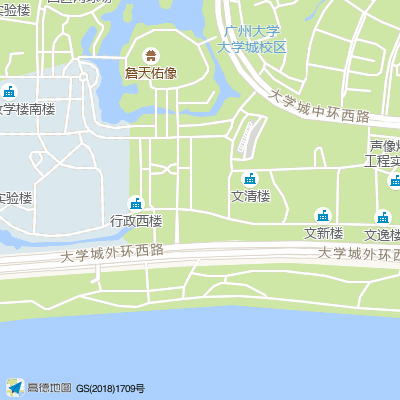

In [22]:
staticmap(广州大学_location,zoom=15)

* 静态地图可能含有计算机视觉的功能

## 坐标转换

In [43]:
def convert(locations,coordsys="gps",sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key,
        'locations':locations,
        'coordsys':coordsys,        
        "sig":sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [44]:
convert = convert(locations="116.481499,39.990475|116.481499,39.990375")
convert

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.487585177952,39.991754014757;116.487585177952,39.991653917101'}

* 坐标转换可能含有自然语言处理的功能

## 天气查询

In [54]:
def weatherInfo(city,extensions="all")->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,        
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [57]:
武汉_weather = weatherInfo(420100)
武汉_weather

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'forecasts': [{'city': '武汉市',
   'adcode': '420100',
   'province': '湖北',
   'reporttime': '2020-04-21 12:53:24',
   'casts': [{'date': '2020-04-21',
     'week': '2',
     'dayweather': '阵雨',
     'nightweather': '多云',
     'daytemp': '17',
     'nighttemp': '11',
     'daywind': '北',
     'nightwind': '北',
     'daypower': '4',
     'nightpower': '4'},
    {'date': '2020-04-22',
     'week': '3',
     'dayweather': '多云',
     'nightweather': '多云',
     'daytemp': '20',
     'nighttemp': '12',
     'daywind': '东北',
     'nightwind': '东北',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-23',
     'week': '4',
     'dayweather': '阵雨',
     'nightweather': '多云',
     'daytemp': '17',
     'nighttemp': '8',
     'daywind': '西南',
     'nightwind': '西南',
     'daypower': '≤3',
     'nightpower': '≤3'},
    {'date': '2020-04-24',
     'week': '5',
     'dayweather': '多云',
     'nightweather': '多云',
  

* 天气查询可能含有信息提取的功能

## 输入提示

In [63]:
def inputtips(keywords,type="分类代码",location=None,city=None,citylimit= "false",datatype="all",sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key,
        'type':type,
        'keywords':keywords,
        'location':location,
        'datatype':datatype,
        'citylimit':citylimit,
        'city':city,
        'sig':sig,        
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [66]:
tip = inputtips(keywords="武汉",city="420100")
tip

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '在外湖北游客酒店',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B001B0IZUF',
   'name': '武汉站',
   'district': '湖北省武汉市洪山区',
   'adcode': '420111',
   'location': '114.424314,30.606697',
   'address': '白云路',
   'typecode': '150200',
   'city': []},
  {'id': 'BV10058420',
   'name': '武汉火车站(地铁站)',
   'district': '湖北省武汉市洪山区',
   'adcode': '420111',
   'location': '114.424376,30.607375',
   'address': '(在建)19号线;(在建)5号线;(规划)10号线;4号线',
   'typecode': '150500',
   'city': []},
  {'id': 'B001B0IZY1',
   'name': '武汉大学',
   'district': '湖北省武汉市武昌区',
   'adcode': '420106',
   'location': '114.365248,30.53786',
   'address': '八一路299号',
   'typecode': '141201',
   'city': []},
  {'id': 'B001B0000A',
   'name': '武汉天河国际机场',
   'district': '湖北省武汉市黄陂区',
   'adcode': '420116',
   'location': '114.221167,30.773612',
   'address': '机场大道',
   't

* 输入提示可能含有推荐系统的功能

## 交通态势

In [67]:
def rectangle(rectangle,level=None,extensions="base",sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key,
        'rectangle':rectangle,
        'level':level,
        'extensions':extensions,
        'sig':sig,        
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [69]:
rec = rectangle(rectangle="116.351147,39.966309;116.357134,39.968727")
rec

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

* 交通态势可能含有计算机视觉的功能

## 地理围栏

In [273]:
def meta()->dict:
        url = 'https://restapi.amap.com/v4/geofence/meta?key=adc12629949386ec11091288b1fc3600'
        params={
            'key':key,
                }
        data ={
                "name": "测试围栏_3",
                "center": "115.672126,38.817129",
                "radius": "2000",
                "enable": "true",
                "valid_time": "2020-05-19",
                "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
                "time": "00:00,11:59;13:00,20:59",
                "desc": "测试围栏描述",
                "alert_condition": "enter;leave"
                }
        response = requests.post(url,params=params,json=data)
        # response.content
        con = response.json()
        return con

In [274]:
con

{'data': {'gid': '41e2446d-feea-49c0-aac6-12b0d18672cc',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 轨迹纠偏

In [251]:
def grasproad()->dict:
            url = 'https://restapi.amap.com/v4/grasproad/driving'
            params={
                'key':key,
                    }
            data =[{
                   "x": 116.449429,
                   "y": 40.014844,
                   "sp": 4,
                   "ag": 110,
                   "tm": 1478831753
                   }, {
                  "x": 116.449639,
                "y": 40.014776,
                "sp": 3,
                "ag": 110,
                "tm": 23
                }, {
                "x": 116.449859,
                "y": 40.014716,
                "sp": 3,
                "ag": 111,
                "tm": 33
                }, {
                "x": 116.450074,
                "y": 40.014658,
                "sp": 3,
                "ag": 110,
                "tm": 31
                }, {
                "x": 116.450273,
                "y": 40.014598,
                "sp": 3,
                "ag": 111,
                "tm": 20
                }]
            response = requests.post(url,params=params,json=data)
            # response.status_code
            # response.content
            result = response.json()
            return result

In [252]:
result

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 总结
* 大多数api都含有AI或者ML的功能
* AI和ML都需要大量数据，而api能够收集数据
* [封装函数已上传至github，点击可查看](https://github.com/camaxjj/API_Learning/blob/master/%E8%82%96%E5%98%89%E5%81%A5-%E8%80%83%E6%9F%A5C-181013137.ipynb)

## 设计应用

## 城市旅游推荐
1. 需要使用到的API：路径规划，搜索poi，静态地图，输入提示，天气查询，交通态势
2. 用户旅游往往只是去城市的知名景点，有些当地人才熟知的景点可能会被忽略
3. 用户在输入框输入城市名，系统获取景点信息，将信息展示在输入框下面
4. 用户点击他感兴趣的景点后，系统会将生成静态地图，并提供天气信息
5. 用户可以选择出行方式，系统会根据交通态势，返回给用户最合适的路径规划